
# Intro

**Context**: 

We want to build a movies' recommender in order to get new movies to watch during the lock down. We will base our work on a variation of the MovieLens dataset. 
The data consists of movies seen by the users, some informations about the movies, and some informations about the users. The problem consists in predicting which movies a given user might like.

We are presenting you here first a naive approach in order to familarize yourself with the problem and show you how it might be solved.

**Task**:

The code presented is a first implementation but has a number of shortcomings in its structure and features (more on that in the conclusion). Your task consist in producing a refactoring, so as to be one step closer to a "clean" code.

**Evaluation**:

Our goal here is two fold:
- See how you understand a problem and adapt to an already given approach to tackle it.
- See how you can design new features.
- See how you manipulate python code: understanding, ideas to refactor etc ...

The projects will be evaluated on the quality of the source code produced.

# Loading the  Necessary Libraries and Data



First, let's load some necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


Now, let us import the necessary data and give them a quick look

In [2]:
#Creating Users DataFrame
users = pd.read_csv("data/users.csv")
print(users.shape)
users

(6040, 5)


,user_id,gender,age,occupation,zip_code
0,0,F,1,10,48067
1,1,M,56,16,70072
2,2,M,25,15,55117
3,3,M,45,7,02460
4,4,M,25,20,55455
...,...,...,...,...,...
6035,6035,F,25,15,32603
6036,6036,F,45,1,76006
6037,6037,F,56,1,14706
6038,6038,F,45,0,01060


In [3]:
#Creating Movies DataFrame
movies = pd.read_csv("data/movies.csv")
movies

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Jumanji,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Grumpier Old Men,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Father of the Bride Part II,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3947,Meet the Parents,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,3948,Requiem for a Dream,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,3949,Tigerland,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,3950,Two Family House,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Creating the Ratings DataFrame
ratings = pd.read_csv("data/ratings.csv")
ratings.head()

,user_id,movie_id,rating
0,0,1192,5
1,0,660,3
2,0,913,3
3,0,3407,4
4,0,2354,5


# Basic Exploratory Data Analysis on the DataSet
It is necessary to perform EDA on the DataFrame in order to gain more insight into the contents of the DataFrame which can help us identify the features that stand-out over the rest.

### Frequency of Movie Genres

Text(0.5, 1.0, 'Frequeny of Movie Genres')

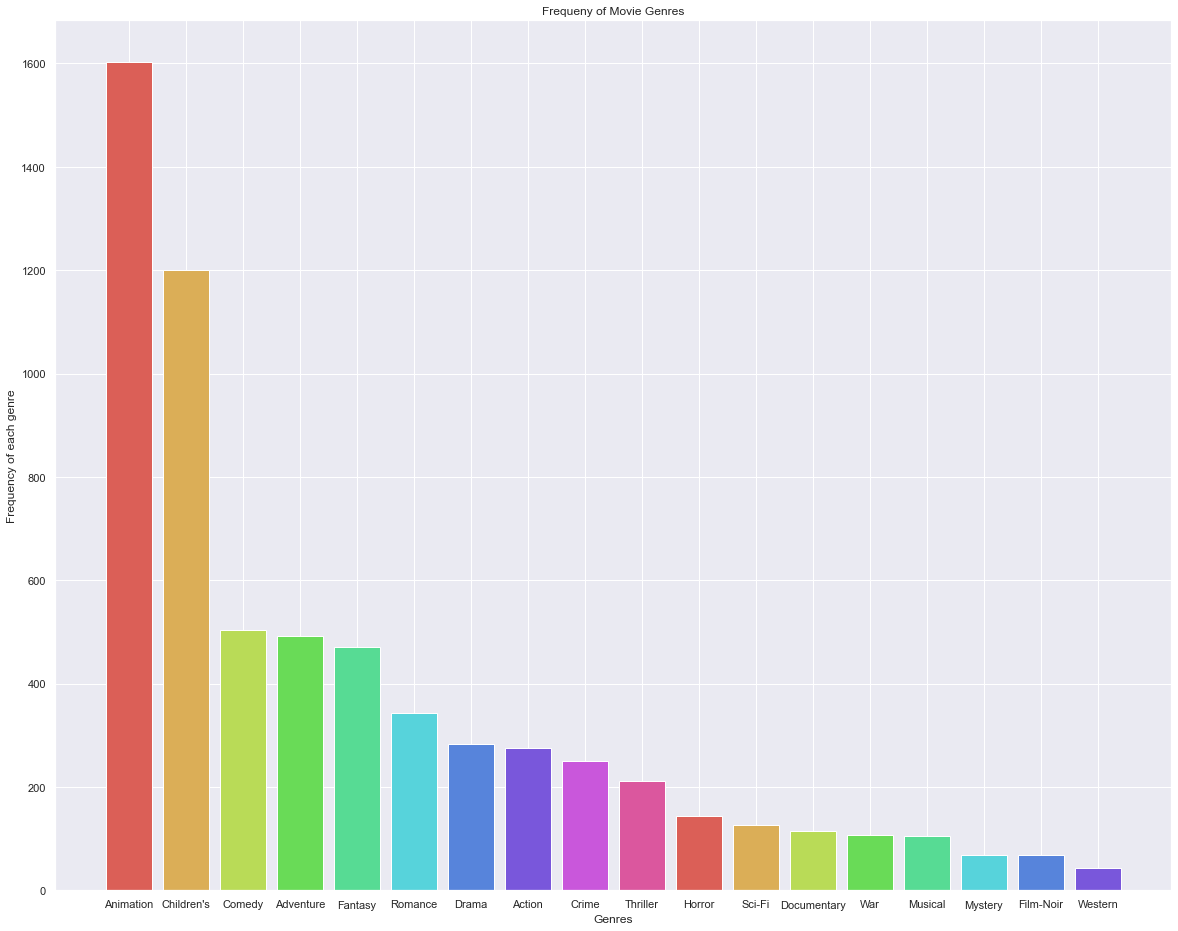

In [5]:
genre_cols = ["Animation", "Children's", 
       'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War',
       'Musical', 'Mystery', 'Film-Noir', 'Western']

plt.subplots(figsize=(20,16))
frequency = movies[genre_cols].sum().sort_values(ascending=False)

plt.bar(np.arange(len(frequency)),frequency.to_list(),color=sns.color_palette('hls',10))
plt.xticks(np.arange(len(frequency)),genre_cols)
plt.xlabel('Genres')
plt.ylabel('Frequency of each genre')
plt.title('Frequeny of Movie Genres')

It is evident that the most common genre is Animation followed by Children and Comedy. This will be relevant later when we use Content Based Filtering.

### Frequency of Movie Release Years

Text(0.5, 1.0, 'Composition of Movie Release Dates')

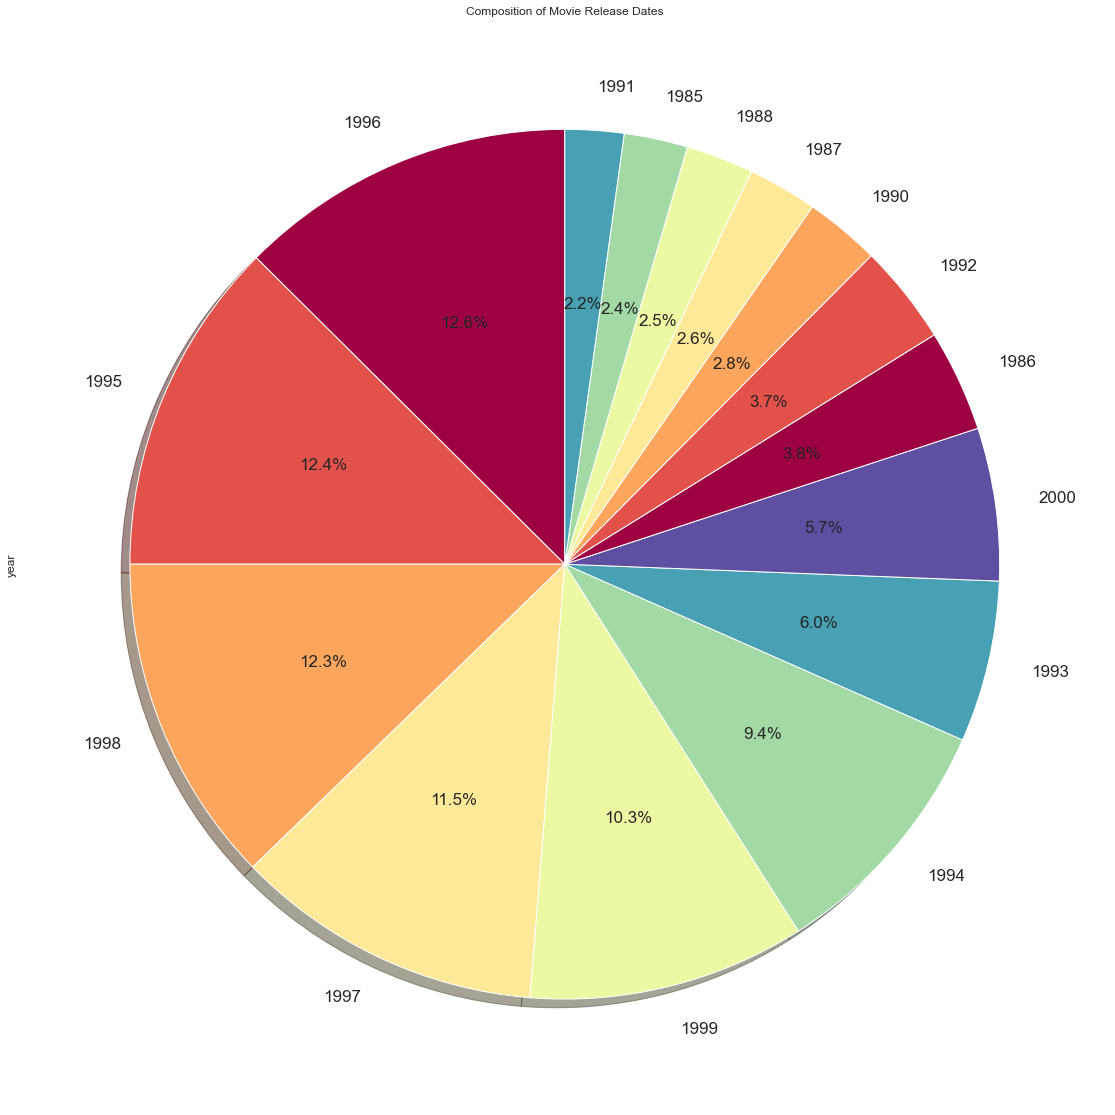

In [6]:
year_col = ["year"]

#Figure 2
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
movies.year.value_counts().nlargest(15).plot(kind='pie', figsize=(25,20)
                                                                        ,autopct='%1.1f%%',
                                                                        startangle=90,shadow=True,
                                                                        fontsize=17,colors=colors)
plt.title('Composition of Movie Release Dates')

As we can observe, Most of the Movies were relaesed around 1990-2000. This information will be relevant later when we use Content Based Filtering.

### Gender Constitution of Users:
As user_id is arbritrary we drop the said column.

Text(0.5, 0, 'Gender of Users')

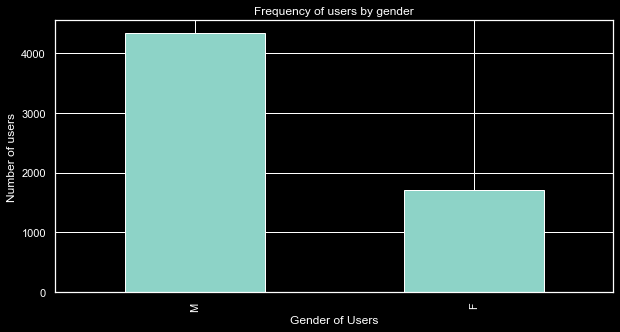

In [7]:
plt.style.use('dark_background')
users.gender.value_counts().nlargest(3).plot(kind='bar', figsize=(10,5))
plt.title("Frequency of users by gender")
plt.ylabel('Number of users')
plt.xlabel('Gender of Users')


We can see that most of the users are Male.

# Scalability
By analysing the DataFrames, we can see that the data suffers from scalability issues as it uses three different tables.
In addition, it can cause problems during the train-test split during the testing phase of Machine Learning as Machine Learning expects all the data to be consolidated into 1 DataFrame. 

In order to counter both problems, we can concatenate all three dataframes into one.
We can see that the Ratings DataFrame has both user_id and movie_id fields. We will use this to form one single dataframe.

In [8]:
user_ratings=ratings.join(users.set_index('user_id'), how='right',on='user_id')
clean_df= user_ratings.join(movies.set_index('movie_id'), how='right',on='movie_id')

In [9]:
clean_df

,user_id,movie_id,rating,gender,age,occupation,zip_code,title,year,Animation,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
40.0,0.0,0,5.0,F,1.0,10.0,48067,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469.0,5.0,0,4.0,F,50.0,9.0,55117,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581.0,7.0,0,4.0,M,25.0,12.0,11413,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711.0,8.0,0,5.0,M,25.0,17.0,61614,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837.0,9.0,0,5.0,F,35.0,1.0,95370,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964309.0,5811.0,3951,4.0,F,25.0,7.0,92120,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967122.0,5830.0,3951,3.0,M,25.0,1.0,92120,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968244.0,5836.0,3951,4.0,M,25.0,7.0,60607,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982282.0,5926.0,3951,1.0,M,35.0,14.0,10003,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
clean_df['gender'] = clean_df['gender'].map({np.nan:0,'F':1, 'M':2}).astype(int)



In [11]:
clean_df

,user_id,movie_id,rating,gender,age,occupation,zip_code,title,year,Animation,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
40.0,0.0,0,5.0,1,1.0,10.0,48067,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469.0,5.0,0,4.0,1,50.0,9.0,55117,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581.0,7.0,0,4.0,2,25.0,12.0,11413,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711.0,8.0,0,5.0,2,25.0,17.0,61614,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837.0,9.0,0,5.0,1,35.0,1.0,95370,Toy Story,1995,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964309.0,5811.0,3951,4.0,1,25.0,7.0,92120,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
967122.0,5830.0,3951,3.0,2,25.0,1.0,92120,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
968244.0,5836.0,3951,4.0,2,25.0,7.0,60607,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
982282.0,5926.0,3951,1.0,2,35.0,14.0,10003,"Contender, The",2000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




# Content-based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback. We dont use other users information !

For example, if user `A` liked `Harry Potter 1`, he/she will like `Harry Potter 2`

In [12]:
%%html
<img src='https://miro.medium.com/max/1642/1*BME1JjIlBEAI9BV5pOO5Mg.png' height="300" width="250"/>

What are similar movies ? In order to answer to this question we need to build a similiarity measure. 

## Features

This measure will operate on the characteristics (**features**) of the movies to determine which are close. In our case, we have access to the genres of the movies. For example, the genres of `Toy Story` are: `Animation`, `Children's` and `Comedy`. This is represented as follow in our dataset:

In [13]:
genre_cols = ["Animation", "Children's", 
       'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War',
       'Musical', 'Mystery', 'Film-Noir', 'Western']
user_info_cols=['gender','age','occupation']
movies_cols= movies.columns
users_cols=users.columns

## Similarity

Now that we have some features, we will try to find a function that performs a similiarity measure. The Similarity function will take two items (two list of features) and return a number proportional to their similarity. 

For the following we will consider that the Similarity between two movies are the number of genres they have in common.


In [14]:
from content_based_filtering.helpers.movies import get_movie_id, get_movie_name, get_movie_year
from content_based_filtering.helpers.Users import *
from content_based_filtering.helpers.Similarity import *

 In order to show-off our scalability from the the merging of the data sets,
 we form new movies and users DataFrame from the merged DataFrame (clean_df).

In [15]:
movies=clean_df[movies_cols]
movies=movies.drop_duplicates(subset ='movie_id', keep = 'first', inplace = False) 
movies.sort_values(by='movie_id')

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
40.0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839.0,1,Jumanji,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3406.0,2,Grumpier Old Men,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583.0,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3408.0,4,Father of the Bride Part II,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714.0,3947,Meet the Parents,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4060.0,3948,Requiem for a Dream,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20575.0,3949,Tigerland,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24155.0,3950,Two Family House,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
movies

,movie_id,title,year,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
40.0,0,Toy Story,1995,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
839.0,1,Jumanji,1995,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3406.0,2,Grumpier Old Men,1995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583.0,3,Waiting to Exhale,1995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3408.0,4,Father of the Bride Part II,1995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714.0,3947,Meet the Parents,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4060.0,3948,Requiem for a Dream,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20575.0,3949,Tigerland,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24155.0,3950,Two Family House,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
users=clean_df[users_cols]
users=users.drop_duplicates(subset ='user_id', keep = 'first', inplace = False) 
users.sort_values(by='user_id')

,user_id,gender,age,occupation,zip_code
40.0,0.0,1,1.0,10.0,48067
148.0,1.0,2,56.0,16.0,70072
187.0,2.0,2,25.0,15.0,55117
238.0,3.0,2,45.0,7.0,02460
297.0,4.0,2,25.0,20.0,55455
...,...,...,...,...,...
999616.0,6036.0,1,45.0,1.0,76006
999728.0,6037.0,1,56.0,1.0,14706
999814.0,6038.0,1,45.0,0.0,01060
999870.0,6039.0,2,25.0,6.0,11106


In [18]:
users.describe()

,user_id,gender,age,occupation
count,6040.000000,6041.000000,6040.000000,6040.000000
mean,3019.500000,1.716769,30.639238,8.146854
std,1743.742145,0.450972,12.895962,6.329511
min,0.000000,0.000000,1.000000,0.000000
25%,1509.750000,1.000000,25.000000,3.000000
50%,3019.500000,2.000000,25.000000,7.000000
75%,4529.250000,2.000000,35.000000,14.000000
max,6039.000000,2.000000,56.000000,20.000000


In [19]:
movies_similarity=get_movies_similarity_matrix(movies[genre_cols])
movies_similarity

array([[3., 1., 1., ..., 0., 0., 0.],
       [1., 3., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 2.]])

In [20]:
similarity_with_toy_story = movies_similarity[0] # 0 is Toy Story
similarity_with_toy_story

array([3., 1., 1., ..., 0., 0., 0.])

In [21]:
for i in range(10):
    print(f"Similarity between Toy story and {movies.iloc[i]['title']} (index {i}) is {similarity_with_toy_story[i]}")


Similarity between Toy story and Toy Story (index 0) is 3.0
Similarity between Toy story and Jumanji (index 1) is 1.0
Similarity between Toy story and Grumpier Old Men (index 2) is 1.0
Similarity between Toy story and Waiting to Exhale (index 3) is 1.0
Similarity between Toy story and Father of the Bride Part II (index 4) is 1.0
Similarity between Toy story and Heat (index 5) is 0.0
Similarity between Toy story and Sabrina (index 6) is 1.0
Similarity between Toy story and Tom and Huck (index 7) is 1.0
Similarity between Toy story and Sudden Death (index 8) is 0.0
Similarity between Toy story and GoldenEye (index 9) is 0.0


### Similarity Between Users
The Similarity between the two users is defined as the sum of the absolute value of the differences bewteen the features.
WE use the Similarity Between Users later to faciliatate Collaborative Filtering.

In [22]:
users_similarity=get_users_similarity_matrix(users[user_info_cols])
users_similarity

array([[ 0., 50., 27., ..., 38., 27., 31.],
       [50.,  0., 29., ..., 18., 29., 31.],
       [27., 29.,  0., ..., 15.,  0.,  8.],
       ...,
       [38., 18., 15., ...,  0., 15., 13.],
       [27., 29.,  0., ..., 15.,  0.,  8.],
       [31., 31.,  8., ..., 13.,  8.,  0.]])

In [23]:
get_most_similar_movies(movies_similarity.astype(int), movies, 'Jumanji')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:
get_most_similar_users(users_similarity,users,0)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Recommending Movies to the User
By our implementation of "Similarity.py" module, we can facilitate the process of  reccomendations to the users quite simply by invoking an instance of "get_content_based_recommendations()" function for Content Based Filtering, 
or "get_collaborative_recommendations()" function for Collaborative Filtering.

In [25]:
get_content_based_recommendations(clean_df,movies,users,users_similarity,0)

ValueError: ('Lengths must match to compare', (1000386,), (6041, 6041))

# Testing and Evaluating
We use sklearn.model_selection to split our DataFrame into Train and Test sets.

In [26]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(clean_df , test_size=0.33, random_state=42)
movies_similarity=get_movies_similarity_matrix(movies[genre_cols])

score=[]
for user in df_test['user_id'].unique():
    recommendations=get_content_based_recommendations(df_test,movies,movies_similarity,user)
    score.append(np.mean(recommendations['similarity'].values))
print(np.mean(score))

TypeError: string indices must be integers